# HR Analytics Prediction: Why do People Resign?

Source: https://www.kaggle.com/code/paramarthasengupta/hr-analytics-prediction-why-do-people-resign/notebook

## Import packages and file

In [3]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
#Read file
df = pd.read_csv('employee_attrition.csv')
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

 ## Data preparation

In [6]:
df.columns = [col.lower() for col in df.columns]
df = df.rename(columns={'businesstravel':'travel',
                        'distancefromhome':'distance_from_home',
                        'educationfield':'field', 
                        'employeecount':'employee_count',
                        'employeenumber': 'employee_number',
                        'environmentsatisfaction':'env_satisfaction',
                        'hourlyrate':'hourly_rate',
                        'jobinvolvement':'job_involvement',
                        'joblevel':'job_level',
                        'jobrole':'job_role',
                        'jobsatisfaction':'job_satisfaction',
                        'maritalstatus':'marital_status',
                        'monthlyincome':'monthly_income',
                        'monthlyrate':'monthly_rate',
                        'numcompaniesworked':'num_companies_worked',
                        'over18':'over_18',
                        'percentsalaryhike':'percent_salary_hike',
                        'performancerating':'performance_rating',
                        'relationshipsatisfaction':'relationship_satisfaction',
                        'standardhours':'standard_hours',
                        'stockoptionlevel':'stock_option_level',
                        'totalworkingyears':'working_years',
                        'trainingtimeslastyear':'training_last_year',
                        'worklifebalance':'work_life_balance',
                        'yearsatcompany': 'years_at_company',
                        'yearsincurrentrole' :'years_in_current_role',
                        'yearssincelastpromotion':'years_since_promotion',
                        'yearswithcurrmanager':'years_with_current_manager'})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   age                         1470 non-null   int64 
 1   attrition                   1470 non-null   object
 2   travel                      1470 non-null   object
 3   dailyrate                   1470 non-null   int64 
 4   department                  1470 non-null   object
 5   distance_from_home          1470 non-null   int64 
 6   education                   1470 non-null   int64 
 7   field                       1470 non-null   object
 8   employee_count              1470 non-null   int64 
 9   employee_number             1470 non-null   int64 
 10  env_satisfaction            1470 non-null   int64 
 11  gender                      1470 non-null   object
 12  hourly_rate                 1470 non-null   int64 
 13  job_involvement             1470 non-null   int6

In [8]:
df.shape

(1470, 35)

In [9]:
df.describe()

,age,dailyrate,distance_from_home,education,employee_count,employee_number,env_satisfaction,hourly_rate,job_involvement,job_level,...,relationship_satisfaction,standard_hours,stock_option_level,working_years,training_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_promotion,years_with_current_manager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
df['over_18'].describe()

count     1470
unique       1
top          Y
freq      1470
Name: over_18, dtype: object

### Dataset info

* age: Minimum age is 18, mean of 37 and maximum of 60
* env_satisfaction: mean of 2.7 with a maximum of 4. (What was the scale?)
* standard_hours: All employees are working 80 hours 
* working_years: mean 11,2 working years, maximum of 40. 7.7 standard deviation, possible outiers increasing the mean
* years_at_company: mean of 7, but standard deviation of 6. 9 in 3rd percentile, 40 in the 4th. Outliers towards the end
* years_in_current_role: mean of 4 years in the current role, but 3.6 of stanradr deviation. The 2nd percentile is 3 years


## EDA

1. Attrition Analysis
Attrition Rate by Age: Group employees by age and calculate the attrition rate. This will help you understand if certain age groups are more likely to leave.
Attrition by Department: Analyze attrition rates across different departments to identify which departments have higher turnover rates.
Attrition by Job Role: Investigate which job roles have the highest attrition rates to identify potentially problematic positions.
Attrition by Distance From Home: Assess if employees living further away from the office are more likely to leave.
2. Job Satisfaction and Attrition
Job Satisfaction vs. Attrition: Analyze how job satisfaction (from the JobSatisfaction column) correlates with attrition. Low satisfaction scores might be a predictor of attrition.
Environment Satisfaction vs. Attrition: Similarly, see if EnvironmentSatisfaction affects attrition rates.
3. Salary and Attrition
Monthly Income vs. Attrition: Determine if there’s a relationship between an employee’s income and their likelihood to leave.
Salary Hike vs. Attrition: Analyze whether employees who received higher salary hikes (PercentSalaryHike) are less likely to leave.
4. Work-Life Balance Analysis
Work-Life Balance vs. Attrition: Explore whether employees with poor work-life balance scores (WorkLifeBalance) are more likely to leave.
OverTime vs. Attrition: Investigate if employees working overtime (OverTime) are more prone to attrition, possibly due to burnout.
5. Performance and Attrition
Performance Rating vs. Attrition: Analyze the relationship between performance ratings and attrition to see if high or low performers are more likely to leave.
Years at Company vs. Performance: Investigate whether longer-tenured employees (YearsAtCompany) tend to have better performance ratings.
6. Career Progression
Promotion History vs. Attrition: See if the time since the last promotion (YearsSinceLastPromotion) affects the likelihood of an employee leaving.
Years in Current Role vs. Attrition: Analyze if employees who have been in the same role for a long time are more likely to leave.
7. Training and Development
Training Times vs. Attrition: Assess whether the number of training sessions attended (TrainingTimesLastYear) correlates with attrition. Lack of development opportunities could be a factor in attrition.
8. Demographic Analysis
Gender and Attrition: Compare attrition rates between genders to see if there are any significant differences.
Marital Status and Attrition: Explore if marital status affects attrition rates, which could be linked to work-life balance.
9. Employee Engagement
Job Involvement vs. Attrition: Analyze if employees with lower job involvement scores are more likely to leave.
Relationship Satisfaction vs. Attrition: Determine if poor relationships at work correlate with higher attrition.
10. Comprehensive Predictive Modeling
Attrition Prediction: Use all relevant columns to build a predictive model (e.g., using logistic regression, decision trees, or machine learning algorithms) to predict which employees are most likely to leave. This model can help HR departments proactively address potential attrition.

In [11]:
# how many people left?

out = df[df['attrition'] == 'Yes'] 
out.shape

(237, 35)

In [12]:
out

,age,attrition,travel,dailyrate,department,distance_from_home,education,field,employee_count,employee_number,...,relationship_satisfaction,standard_hours,stock_option_level,working_years,training_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_promotion,years_with_current_manager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,80,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,...,3,80,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Travel_Frequently,638,Sales,9,3,Marketing,1,2023,...,1,80,1,1,3,2,1,0,1,0
1442,29,Yes,Travel_Rarely,1092,Research & Development,1,4,Medical,1,2027,...,2,80,3,4,3,4,2,2,2,2
1444,56,Yes,Travel_Rarely,310,Research & Development,7,2,Technical Degree,1,2032,...,4,80,1,14,4,1,10,9,9,8
1452,50,Yes,Travel_Frequently,878,Sales,1,4,Life Sciences,1,2044,...,4,80,2,12,3,3,6,3,0,1


In [13]:
out.describe()

,age,dailyrate,distance_from_home,education,employee_count,employee_number,env_satisfaction,hourly_rate,job_involvement,job_level,...,relationship_satisfaction,standard_hours,stock_option_level,working_years,training_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_promotion,years_with_current_manager
count,237.000000,237.000000,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,...,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,401.899519,8.452525,1.008244,0.0,580.750572,1.169791,20.099958,0.773405,0.940594,...,1.125437,0.0,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,103.000000,1.000000,1.000000,1.0,1.000000,1.000000,31.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,408.000000,3.000000,2.000000,1.0,514.000000,1.000000,50.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,699.000000,9.000000,3.000000,1.0,1017.000000,3.000000,66.000000,3.000000,1.000000,...,3.000000,80.0,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1092.000000,17.000000,4.000000,1.0,1486.000000,4.000000,84.000000,3.000000,2.000000,...,4.000000,80.0,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1496.000000,29.000000,5.000000,1.0,2055.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


### Attrition by age

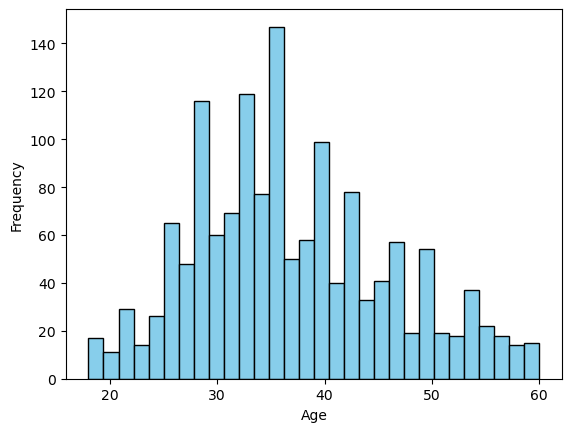

In [14]:
#All employees' age distribution

df['age'].plot(kind='hist', 
                    xlabel='Age', 
                    ylabel='Frequency', 
                    bins=30,
                    color='skyblue',
                    edgecolor='black'
                    );

In [15]:
age_total = df.groupby('age').size().sort_values(ascending=False)
age_total

age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
38    58
33    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
53    19
48    19
51    19
52    18
54    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
dtype: int64

In [16]:
#Grouping employees that left age
age_out = out.groupby('age').size().sort_values(ascending=False)
age_out

age
31    18
29    18
28    14
33    12
26    12
32    11
35    10
30     9
34     9
24     7
19     6
36     6
37     6
39     6
41     6
25     6
44     6
21     6
20     6
50     5
40     5
58     5
22     5
18     4
23     4
46     4
56     3
55     3
47     3
27     3
52     3
51     2
53     2
38     2
49     2
45     2
43     2
42     2
48     2
dtype: int64

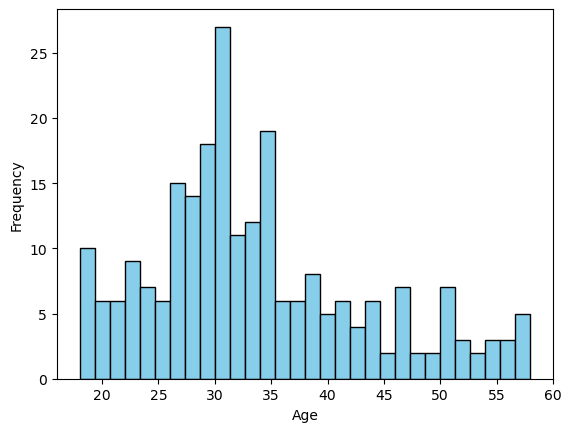

In [17]:
out['age'].plot(kind='hist', 
                    xlabel='Age', 
                    ylabel='Frequency', 
                    bins=30,
                    color='skyblue',
                    edgecolor='black'
                    );

# 28-35 is the most frequent age ranges of employees who have left. 

In [18]:
# Attrition rate by age
attrition_rate_age = (age_out/age_total) * 100

# Fill NA and sort
attrition_rate_age = attrition_rate_age.fillna(0).sort_values(ascending=False)
attrition_rate_age


age
19    66.666667
20    54.545455
18    50.000000
21    46.153846
58    35.714286
22    31.250000
26    30.769231
28    29.166667
23    28.571429
24    26.923077
29    26.470588
31    26.086957
25    23.076923
56    21.428571
33    20.689655
44    18.181818
32    18.032787
52    16.666667
50    16.666667
30    15.000000
41    15.000000
39    14.285714
55    13.636364
35    12.820513
47    12.500000
46    12.121212
37    12.000000
34    11.688312
51    10.526316
53    10.526316
48    10.526316
40     8.771930
36     8.695652
49     8.333333
43     6.250000
27     6.250000
45     4.878049
42     4.347826
38     3.448276
54     0.000000
57     0.000000
59     0.000000
60     0.000000
dtype: float64

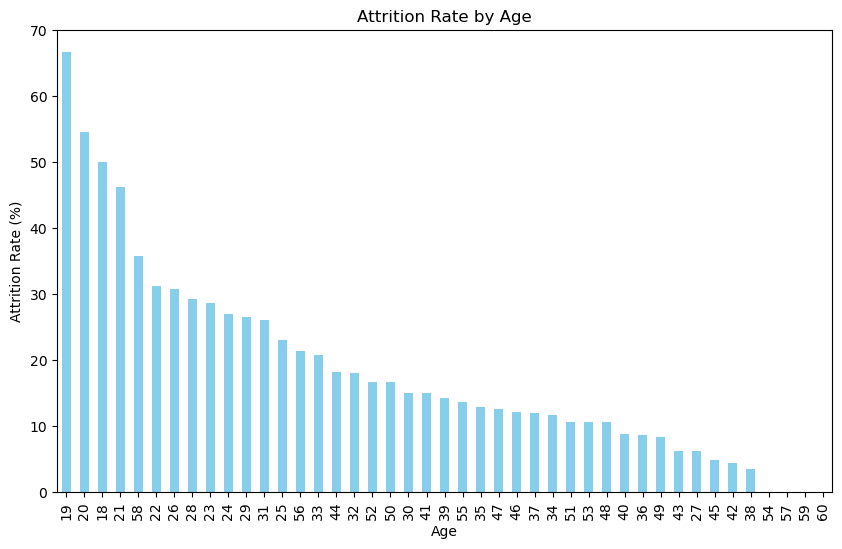

In [19]:
# Bar plot
attrition_rate_age.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Attrition Rate by Age')
plt.xlabel('Age')
plt.ylabel('Attrition Rate (%)')
plt.show()

### Attrition by department

In [20]:
dep_total = df.groupby('department').size().sort_values(ascending=False)
dep_total

department
Research & Development    961
Sales                     446
Human Resources            63
dtype: int64

In [21]:
dep_out = out.groupby('department').size().sort_values(ascending=False)
dep_out

department
Research & Development    133
Sales                      92
Human Resources            12
dtype: int64

In [22]:
# Attrition rate by department
attrition_rate_dep = (dep_out / dep_total)*100

# Fill NA and sort
attrition_rate_dep = attrition_rate_dep.fillna(0).sort_values(ascending=False)
attrition_rate_dep

department
Sales                     20.627803
Human Resources           19.047619
Research & Development    13.839750
dtype: float64

### Attrition by job role

In [23]:
role_total = df.groupby('job_role').size().sort_values(ascending=False)
role_total

job_role
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
dtype: int64

In [24]:
role_out = out.groupby('job_role').size().sort_values(ascending=False)
role_out

job_role
Laboratory Technician        62
Sales Executive              57
Research Scientist           47
Sales Representative         33
Human Resources              12
Manufacturing Director       10
Healthcare Representative     9
Manager                       5
Research Director             2
dtype: int64

In [25]:
# Attrition rate by job role
attrition_rate_role = (role_out / role_total)*100

# Fill NA and sort
attrition_rate_role = attrition_rate_role.fillna(0).sort_values(ascending=False)
attrition_rate_role

job_role
Sales Representative         39.759036
Laboratory Technician        23.938224
Human Resources              23.076923
Sales Executive              17.484663
Research Scientist           16.095890
Manufacturing Director        6.896552
Healthcare Representative     6.870229
Manager                       4.901961
Research Director             2.500000
dtype: float64

### Attrition by distance from home

In [26]:
# Distance from hom data
df['distance_from_home'].describe()

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: distance_from_home, dtype: float64

In [27]:
distance_total = df.groupby('distance_from_home').size().sort_values(ascending=False)
distance_total
distance_total.head(5)

distance_from_home
2     211
1     208
10     86
9      85
3      84
dtype: int64

In [28]:
distance_out = out.groupby('distance_from_home').size().sort_values(ascending=False)
distance_out.head(5)

distance_from_home
2     28
1     26
9     18
3     14
24    12
dtype: int64

In [29]:
# Attrition rate by distance from home
attrition_rate_distance = (distance_out / distance_total)*100

# Fill NA and sort
attrition_rate_distance = attrition_rate_distance.fillna(0).sort_values(ascending=False)
attrition_rate_distance.head(5)

distance_from_home
24    42.857143
13    31.578947
22    31.578947
12    30.000000
27    25.000000
dtype: float64

### Attrition by job, environment and reltionship satisfaction 

In [30]:
#Job satisfaction
job_sat = df['job_satisfaction'].value_counts()
job_sat

job_satisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64

In [31]:
job_sat_out = out['job_satisfaction'].value_counts()
job_sat_out

job_satisfaction
3    73
1    66
4    52
2    46
Name: count, dtype: int64

In [32]:
# Attrition rate by job satisfaction
attrition_rate_job_sat = (job_sat_out / job_sat)*100
attrition_rate_job_sat

job_satisfaction
1    22.837370
2    16.428571
3    16.515837
4    11.328976
Name: count, dtype: float64

In [33]:
#Environment environment
env_sat = df['env_satisfaction'].value_counts()
env_sat

env_satisfaction
3    453
4    446
2    287
1    284
Name: count, dtype: int64

In [34]:
env_sat_out = out['env_satisfaction'].value_counts()
env_sat_out

env_satisfaction
1    72
3    62
4    60
2    43
Name: count, dtype: int64

In [35]:
# Attrition rate by environment satisfaction
attrition_rate_env_sat = (env_sat_out / env_sat)*100
attrition_rate_env_sat

env_satisfaction
1    25.352113
2    14.982578
3    13.686534
4    13.452915
Name: count, dtype: float64

In [36]:
#Relationship satisfaciton
rel_sat = df['relationship_satisfaction'].value_counts()
rel_sat

relationship_satisfaction
3    459
4    432
2    303
1    276
Name: count, dtype: int64

In [37]:
rel_sat_out = out['relationship_satisfaction'].value_counts()
rel_sat_out

relationship_satisfaction
3    71
4    64
1    57
2    45
Name: count, dtype: int64

In [38]:
# Attrition rate by relationship satisfaction
attrition_rate_rel_sat = (rel_sat_out / rel_sat)*100
attrition_rate_rel_sat

relationship_satisfaction
1    20.652174
2    14.851485
3    15.468410
4    14.814815
Name: count, dtype: float64

### Roles and satisfaction

On a scale of 1 to 4

In [40]:
satisfaction_roles = df.groupby('job_role')['job_satisfaction'].mean().sort_values()
satisfaction_roles

job_role
Human Resources              2.557692
Manufacturing Director       2.682759
Laboratory Technician        2.691120
Research Director            2.700000
Manager                      2.705882
Sales Representative         2.734940
Sales Executive              2.754601
Research Scientist           2.773973
Healthcare Representative    2.786260
Name: job_satisfaction, dtype: float64

In [ ]:
satisfaction_roles = df.groupby('job_role')['job_satisfaction'].mean().sort_values()
satisfaction_roles


### Salary



In [41]:
df['monthly_income'].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: monthly_income, dtype: float64

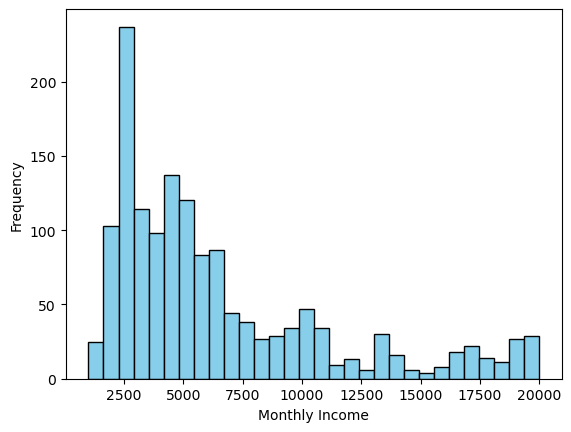

In [42]:
#Monthly income distribution

df['monthly_income'].plot(kind='hist', 
                    xlabel='Monthly Income', 
                    ylabel='Frequency', 
                    bins=30,
                    color='skyblue',
                    edgecolor='black'
                    );

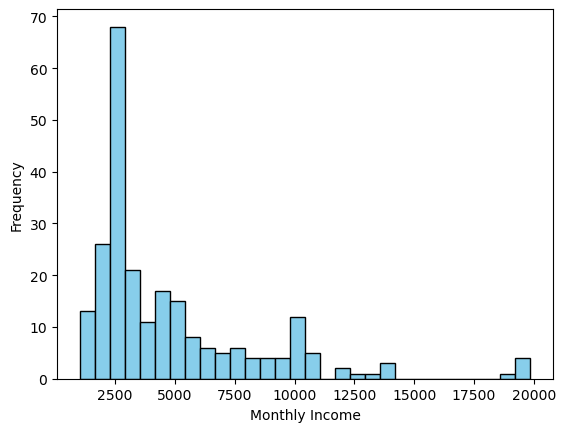

In [43]:
#Gone employees income distribution

out['monthly_income'].plot(kind='hist', 
                    xlabel='Monthly Income', 
                    ylabel='Frequency', 
                    bins=30,
                    color='skyblue',
                    edgecolor='black'
                    );

In [44]:
income_roles = df.groupby('job_role')['monthly_income'].mean().sort_values()
income_roles

job_role
Sales Representative          2626.000000
Laboratory Technician         3237.169884
Research Scientist            3239.972603
Human Resources               4235.750000
Sales Executive               6924.279141
Manufacturing Director        7295.137931
Healthcare Representative     7528.763359
Research Director            16033.550000
Manager                      17181.676471
Name: monthly_income, dtype: float64